  **"Gold Investment Strategy Analysis"**

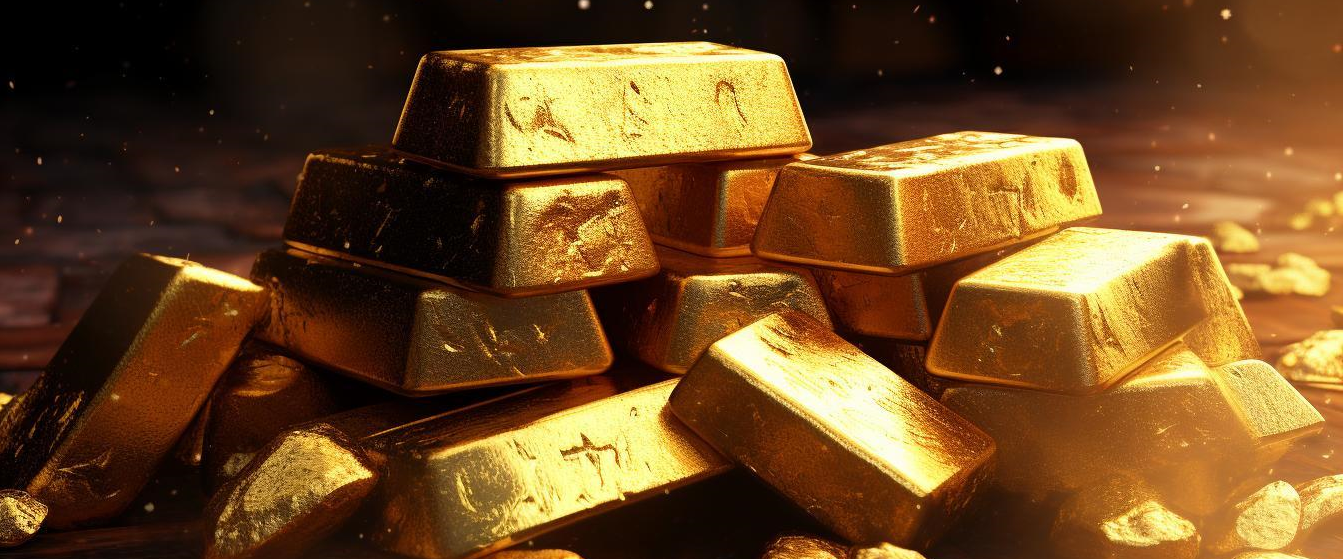

# Business Problem:

The client has capital to invest and wants to decide which is the better investment: gold or the U.S. dollar. The client aims to maximize returns while minimizing risk over the long term. The project’s goal is to provide an in-depth analysis of the historical performance of both gold and the U.S. dollar and to compare potential returns based on data spanning several years.

#Agenda

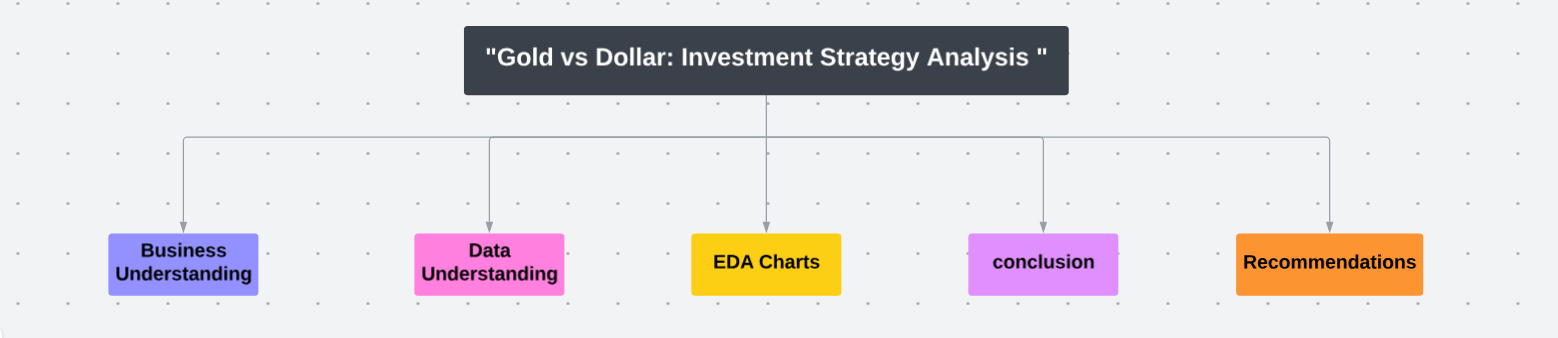

#**Business Understanding**

**Objective:**
The primary goal of this project is to help the client make an informed investment decision based on a comprehensive analysis of the performance of gold over several years. The focus will be on analyzing the returns in terms of risk-to-reward ratio to determine the optimal option that offers the best possible returns on investment.

# Data Understanding


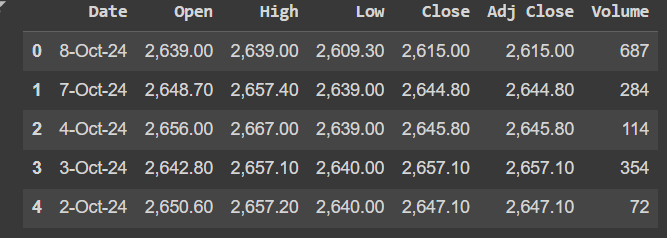

**a data table related to gold prices over several days. The table contains the following columns:**

**Date:** The date of gold trading.

**Open:** The price of gold at the beginning of the day.

**High:** The highest price gold reached during the day.

**Low:** The lowest price gold reached during the day.

**Close:** The price of gold at the end of the trading day.

**Adj Close (Adjusted Close):** Reflects the closing price adjusted for dividends or stock splits (if applicable).

**Volume:** The number of gold units traded that day.

# EDA Charts

**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
pd.set_option('display.precision',	2)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


**load data**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/datasets/gold.csv")

Data Cleaning

In [4]:
df.head() # show first 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,8-Oct-24,"2,639.00","2,639.00","2,609.30","2,615.00","2,615.00",687
1,7-Oct-24,"2,648.70","2,657.40","2,639.00","2,644.80","2,644.80",284
2,4-Oct-24,"2,656.00","2,667.00","2,639.00","2,645.80","2,645.80",114
3,3-Oct-24,"2,642.80","2,657.10","2,640.00","2,657.10","2,657.10",354
4,2-Oct-24,"2,650.60","2,657.20","2,640.00","2,647.10","2,647.10",72


In [4]:
df.shape # show (number of rows , number of columns)

(6048, 7)

data contains 6048 rows and 7 columns

**drop duplicates**

In [5]:
df.drop_duplicates(inplace=True)  # remove duplicates

In [6]:
df.shape

(6048, 7)

data is not contains duplicates

 **Checking	the	datatypes	of	feature**

In [7]:
df.dtypes

,0
Date,object
Open,object
High,object
Low,object
Close,object
Adj Close,object
Volume,object


 **Changing	the	datatypes	of	features**

In [8]:
import pandas as pd
import numpy as np

# Convert the Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Remove commas and convert relevant columns to float
df["Open"] = df["Open"].astype(str).str.replace(',', '').astype(float)
df["High"] = df["High"].astype(str).str.replace(',', '').astype(float)
df["Low"] = df["Low"].astype(str).str.replace(',', '').astype(float)
df["Close"] = df["Close"].astype(str).str.replace(',', '').astype(float)
df["Adj Close"] = df["Adj Close"].astype(str).str.replace(',', '').astype(float)

# Handle Volume (replace non-numeric values with NaN, remove commas, then convert to int)
df["Volume"] = pd.to_numeric(df["Volume"].astype(str).str.replace(',', ''), errors='coerce')

# Convert Volume to integer after handling non-numeric values
df["Volume"] = df["Volume"].fillna(0).astype(int)  # Optionally fill NaN with 0 or handle it as needed


In [9]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [10]:
df.head(10) # show first 10 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-10-08,2639.0,2639.0,2609.3,2615.0,2615.0,687
1,2024-10-07,2648.7,2657.4,2639.0,2644.8,2644.8,284
2,2024-10-04,2656.0,2667.0,2639.0,2645.8,2645.8,114
3,2024-10-03,2642.8,2657.1,2640.0,2657.1,2657.1,354
4,2024-10-02,2650.6,2657.2,2640.0,2647.1,2647.1,72
5,2024-10-01,2631.4,2670.9,2631.4,2667.3,2667.3,153
6,2024-09-30,2660.9,2662.1,2623.2,2636.1,2636.1,973
7,2024-09-27,2670.0,2672.1,2641.7,2644.3,2644.3,4228
8,2024-09-26,2662.3,2669.9,2660.8,2669.9,2669.9,17216
9,2024-09-25,2656.3,2664.2,2649.3,2659.2,2659.2,175


**Checking the null values**

In [11]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


**Observation**

Zero null value in the dataset

**Univariate Analysis**

In [12]:
numerical_features=[col for col in df.columns if df[col] .dtype != 0]
numerical_features

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

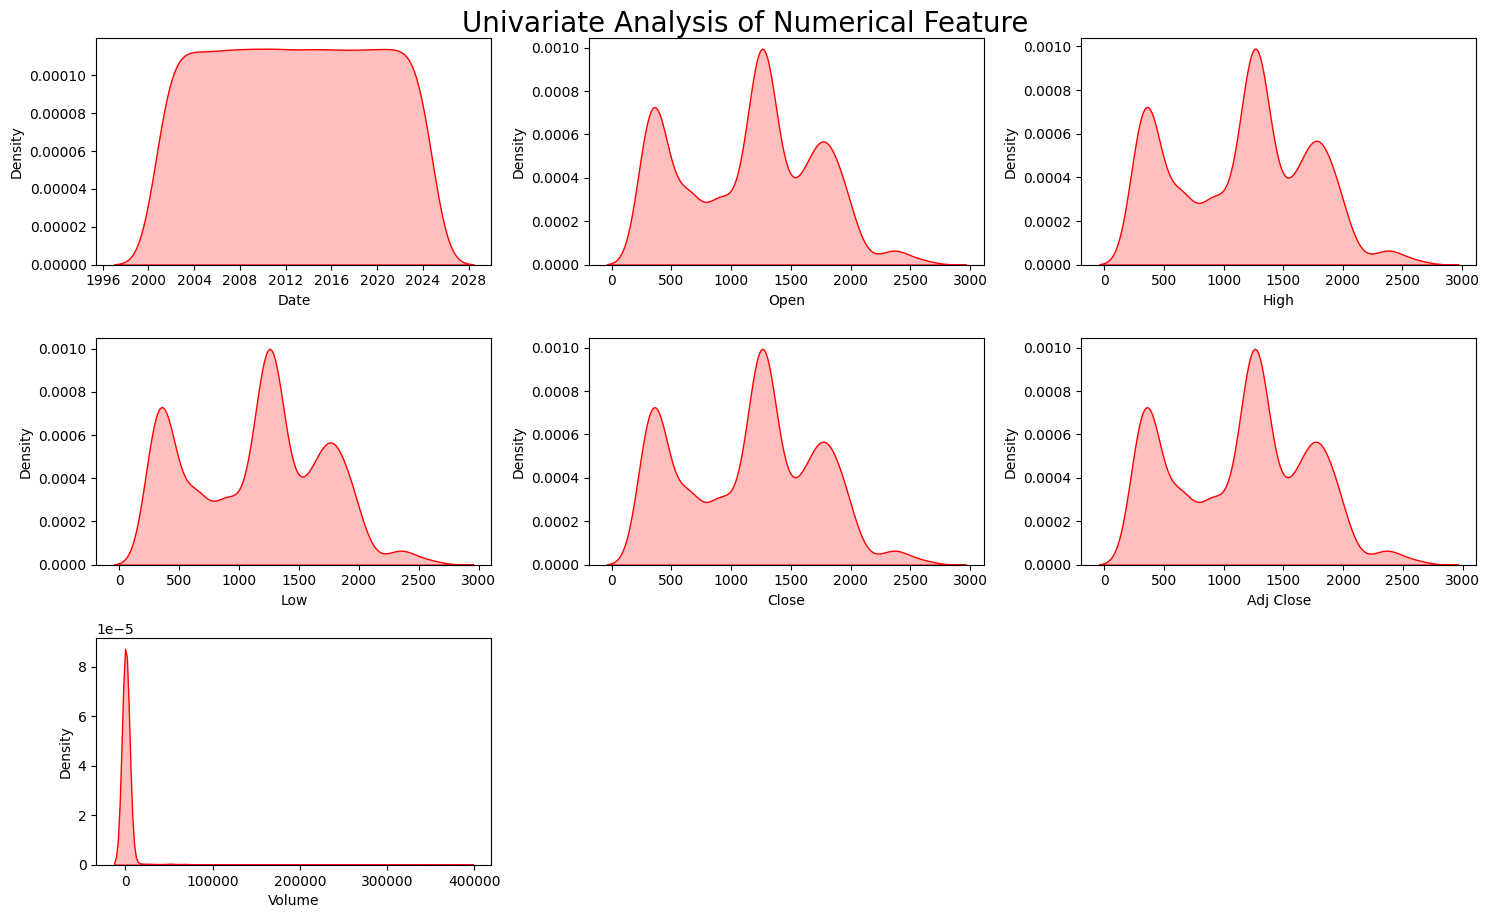

In [13]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature', fontsize=20, fontweight=20)
for i in range(0, len(numerical_features)):
  plt.subplot(5, 3, i+1)
  sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

**The graph provides a univariate analysis of several numerical features of stock market data:**

**1. Date:**

The data is uniformly distributed across the period (likely 2000–2025), suggesting that the dataset covers a large time span with no gaps.

**2. Open, High, Low, Close, Adj Close:** These price-related features show similar multimodal distributions, with prominent peaks around 500, 1000, and 1500. This indicates that the stock prices frequently traded within these ranges.

**3. Volume:**

Volume: This feature is right-skewed, meaning most trading days had relatively low volume, with occasional days of high volume.




In [14]:
# Set Pandas to display all rows
pd.set_option('display.max_rows', len(df))


In [15]:
df["Volume"].max()

386334

In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

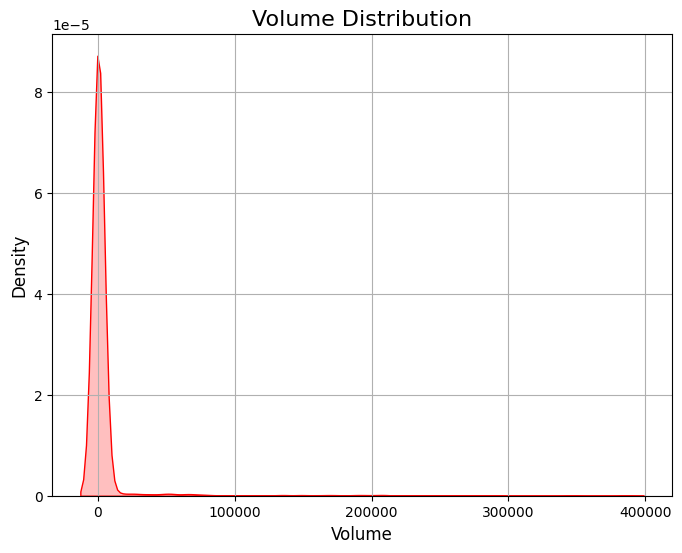

In [17]:
# Plotting the KDE distribution for 'Volume'
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Volume"], fill=True, color="red")
plt.title("Volume Distribution", fontsize=16)
plt.xlabel("Volume", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True)
plt.show()


In [18]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [19]:
# import numpy as np

# # Apply log transformation to reduce skewness
# df['Volume_log'] = np.log1p(df['Volume'])  # Using log1p to handle zero values

# # Plot the KDE after log transformation
# plt.figure(figsize=(12, 8))
# sns.kdeplot(df['Volume_log'], fill=True, color="blue")
# plt.title("Log-Transformed Volume Distribution", fontsize=18)
# plt.xlabel("Log(Volume)", fontsize=14)
# plt.ylabel("Density", fontsize=14)
# plt.grid(True)
# plt.show()


In [20]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-10-08,2639.0,2639.0,2609.3,2615.0,2615.0,687
1,2024-10-07,2648.7,2657.4,2639.0,2644.8,2644.8,284
2,2024-10-04,2656.0,2667.0,2639.0,2645.8,2645.8,114
3,2024-10-03,2642.8,2657.1,2640.0,2657.1,2657.1,354
4,2024-10-02,2650.6,2657.2,2640.0,2647.1,2647.1,72


**Describe**

to view some basic statistical details like percentile , mean , std , etc of a data frame

In [21]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()

,Open,High,Low,Close,Adj Close,Volume
count,6048.00,6048.00,6048.00,6048.00,6048.00,6048.00
mean,1146.68,1152.38,1140.72,1146.62,1146.62,4273.73
std,564.23,567.34,561.07,564.26,564.26,24316.11
min,255.00,256.10,255.00,255.10,255.10,0.00
25%,628.25,629.53,625.62,627.38,627.38,20.00
50%,1230.20,1236.00,1225.30,1229.85,1229.85,105.00
75%,1598.62,1608.15,1588.62,1600.00,1600.00,396.00
max,2670.00,2672.10,2660.80,2669.90,2669.90,386334.00


**Data correlations**

In [22]:
corr=df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

<Axes: >

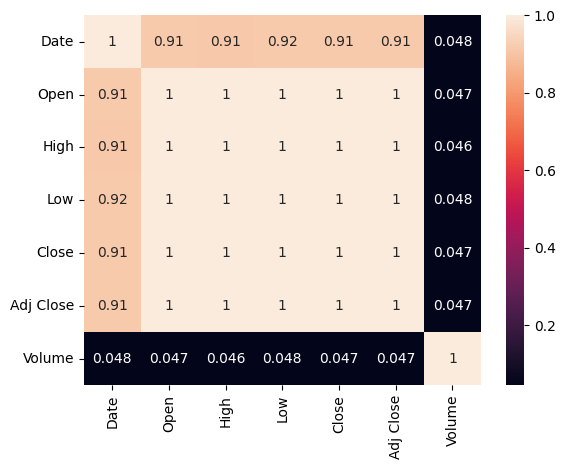

In [23]:
sns.heatmap(corr,annot=True)

**Observation**

 The	target	feature	Close	is	highly	positively	correlated	with	Date

**From the graph:**

Open, High, Low, Close, Adj Close:

  These columns represent different price points for the same assets and are likely correlated with each other.

It is advisable to keep only one or two of these columns. For example:

  Close: Often used as a representative price for analysis.
  
  Volume: Including volume can provide insights into market behavior when analyzing price movements.

In [24]:
# remove this columns [Open, High, Low, Adj Close]
df.drop(["Open", "High", "Low","Adj Close"],axis=1,inplace=True)

In [25]:
df.head()

,Date,Close,Volume
0,2024-10-08,2615.0,687
1,2024-10-07,2644.8,284
2,2024-10-04,2645.8,114
3,2024-10-03,2657.1,354
4,2024-10-02,2647.1,72


In [26]:
# Swap columns close and volume
df[["Date", "Close" ,	"Volume"]]=df[["Date","Volume","Close"]]

In [27]:
df.head()

,Date,Close,Volume
0,2024-10-08,687,2615.0
1,2024-10-07,284,2644.8
2,2024-10-04,114,2645.8
3,2024-10-03,354,2657.1
4,2024-10-02,72,2647.1


In [28]:
# Swap the column names 'volume' and 'Close'
df.rename(columns={'Close': 'Volume', 'Volume': 'Price'}, inplace=True)

In [29]:
df.head()

,Date,Volume,Price
0,2024-10-08,687,2615.0
1,2024-10-07,284,2644.8
2,2024-10-04,114,2645.8
3,2024-10-03,354,2657.1
4,2024-10-02,72,2647.1


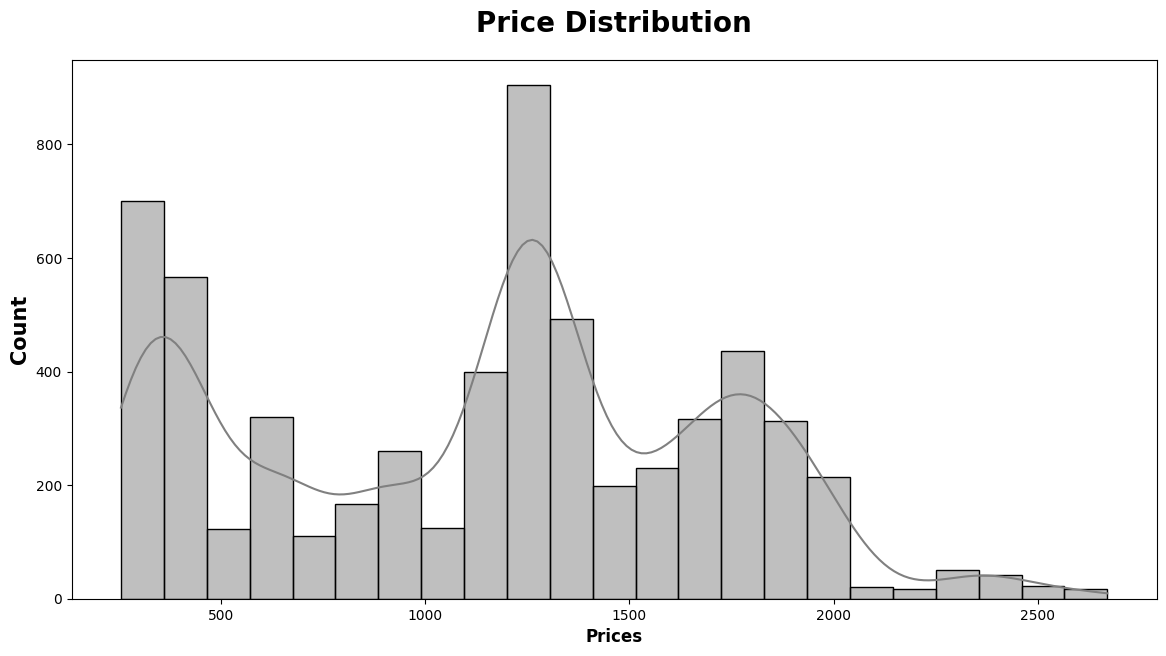

In [30]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Price,	ec	=	"black",	color='gray',	kde=True)
plt.title("Price Distribution",	weight="bold",fontsize=20,	pad=20)
plt.ylabel("Count",	weight="bold",	fontsize=15)
plt.xlabel("Prices",	weight="bold",	fontsize=12)
plt.show()

**Observation**

 Prices	occur	most	of	the	time	in	range	1200	to	1300

  Price Vs Date

In [31]:
df.dtypes

,0
Date,datetime64[ns]
Volume,int64
Price,float64


In [32]:
# Extract year and month into new columns
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month

In [33]:
df.head()

,Date,Volume,Price,Year,Month
0,2024-10-08,687,2615.0,2024,10
1,2024-10-07,284,2644.8,2024,10
2,2024-10-04,114,2645.8,2024,10
3,2024-10-03,354,2657.1,2024,10
4,2024-10-02,72,2647.1,2024,10


In [34]:
# Group by year and month, then calculate the maximum price
grouped = df.groupby(['Year', 'Month']).agg({'Price': 'max'}).reset_index()

In [35]:
print(grouped.head())

   Year  Month  Price
0  2000      8  278.3
1  2000      9  278.4
2  2000     10  276.4
3  2000     11  270.1
4  2000     12  275.2


In [36]:
#Find the month and year with the highest price
max_price_row = grouped[grouped['Price'] == grouped['Price'].max()]


In [37]:
# Display the result
print("Month and Year with the highest price:\n", max_price_row)

Month and Year with the highest price:
      Year  Month   Price
289  2024      9  2669.9


**observation**

In September 2024, the highest price recorded was 2669.9.

In [38]:
# Group by year and month, then calculate the minimum price
grouped = df.groupby(['Year', 'Month']).agg({'Price': 'min'}).reset_index()

In [39]:
#Find the month and year with low price
min_price_row = grouped[grouped['Price'] == grouped['Price'].min()]

In [40]:
# Display the result
print("Month and Year with the low price:\n", min_price_row)

Month and Year with the low price:
    Year  Month  Price
6  2001      2  255.1


observation

In February 2001, the lowest price recorded was 255.1

**price	Vs	date	feature**

In [41]:
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(128,128,128,1)')

<Axes: xlabel='Date', ylabel='Price'>

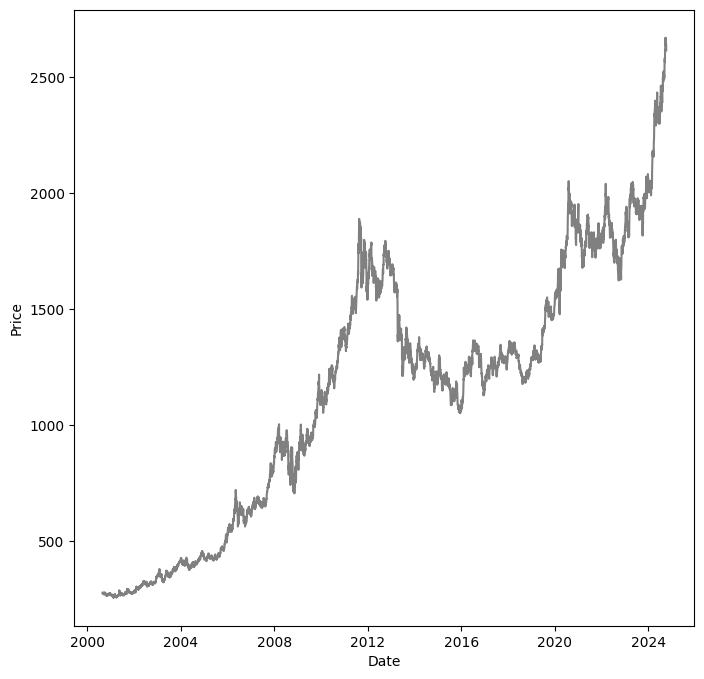

In [42]:
plt.figure(figsize=(8,8))
sns.lineplot(y="Price",x="Date",data=df,color="gray")

**observation of the Gold Price Trend (2000-2024):**

Steady Growth:

Gold prices show a consistent upward trend from 2000 to 2024, rising from below 500 to over 2500.

**Increased Volatility:**

After 2010, prices became more volatile, with sharp fluctuations indicating economic events or global factors influencing the market.

**Recent Stability:**

By 2024, gold prices have stabilized at a higher level, showing less fluctuation but maintaining a significant value.

This suggests gold has been a strong long-term investment, though recent volatility highlights the importance of strategic timing for short-term investors.

**Price Vs Date**

<Figure size 1000x1000 with 0 Axes>

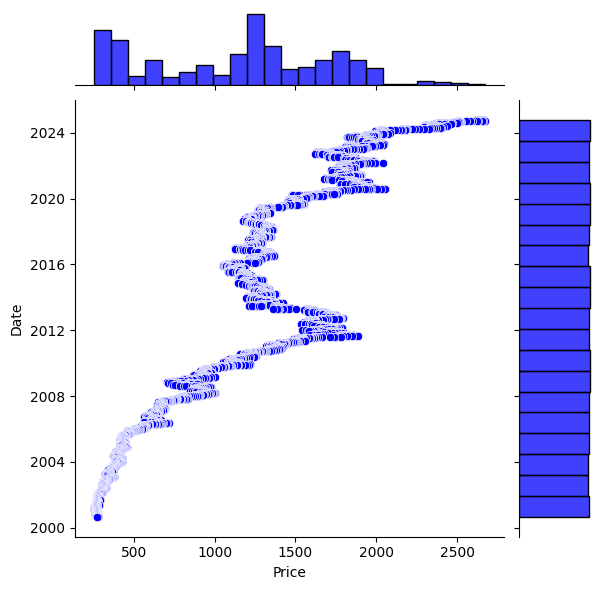

In [43]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Price",y="Date",data=df,color="b")

**Checking	the	outliers	of	the	target	'Price'	feature**

<Axes: ylabel='Price'>

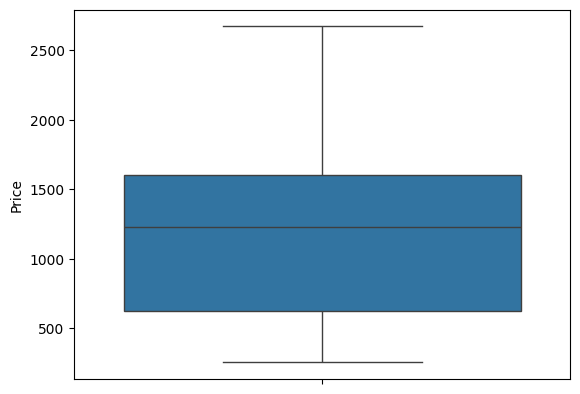

In [44]:
sns.boxplot(df["Price"])

from the graph no outliers in the feature .

Boxplot	of	Price	Vs	Date

In [45]:
df.head()

,Date,Volume,Price,Year,Month
0,2024-10-08,687,2615.0,2024,10
1,2024-10-07,284,2644.8,2024,10
2,2024-10-04,114,2645.8,2024,10
3,2024-10-03,354,2657.1,2024,10
4,2024-10-02,72,2647.1,2024,10


In [46]:
# Group by year and month, then calculate the maximum volume
grouped_volume = df.groupby(['Year', 'Month']).agg({'Volume': 'max'}).reset_index()

In [47]:
print(grouped_volume.head(20))

    Year  Month  Volume
0   2000      8       0
1   2000      9    3511
2   2000     10     161
3   2000     11   28696
4   2000     12     407
5   2001      1   15489
6   2001      2     410
7   2001      3   22994
8   2001      4     456
9   2001      5   28775
10  2001      6     251
11  2001      7   17975
12  2001      8     436
13  2001      9    1183
14  2001     10     157
15  2001     11   22395
16  2001     12     478
17  2002      1   23818
18  2002      2    1043
19  2002      3   24896


In [48]:
#Find the month and year with the highest volume
max_volume = grouped_volume[grouped_volume['Volume'] == grouped_volume['Volume'].max()]

In [49]:
# Display the result
print("Month and Year with the highest volume:\n", max_volume)

Month and Year with the highest volume:
      Year  Month  Volume
213  2018      5  386334


**observation**

the highest trading volume occurred in May 2018, with a volume of 386,334

In [50]:
# Group by year and month, then calculate the minimum volume
grouped_volume = df.groupby(['Year', 'Month']).agg({'Volume': 'min'}).reset_index()

In [51]:
print(grouped_volume.head(20))

    Year  Month  Volume
0   2000      8       0
1   2000      9       0
2   2000     10       0
3   2000     11       0
4   2000     12       0
5   2001      1       0
6   2001      2       0
7   2001      3       0
8   2001      4       0
9   2001      5       0
10  2001      6       0
11  2001      7       0
12  2001      8       0
13  2001      9       0
14  2001     10       0
15  2001     11       0
16  2001     12       0
17  2002      1       1
18  2002      2       0
19  2002      3       0


In [52]:
#Find the month and year with the min volume
min_volume = grouped_volume[grouped_volume['Volume'] == grouped_volume['Volume'].min()]

In [53]:
# Display the result
print("Month and Year with the min volume:\n", min_volume)

Month and Year with the min volume:
      Year  Month  Volume
0    2000      8       0
1    2000      9       0
2    2000     10       0
3    2000     11       0
4    2000     12       0
5    2001      1       0
6    2001      2       0
7    2001      3       0
8    2001      4       0
9    2001      5       0
10   2001      6       0
11   2001      7       0
12   2001      8       0
13   2001      9       0
14   2001     10       0
15   2001     11       0
16   2001     12       0
18   2002      2       0
19   2002      3       0
20   2002      4       0
21   2002      5       0
22   2002      6       0
23   2002      7       0
24   2002      8       0
25   2002      9       0
26   2002     10       0
27   2002     11       0
28   2002     12       0
29   2003      1       0
30   2003      2       0
31   2003      3       0
32   2003      4       0
45   2004      5       0
47   2004      7       0
49   2004      9       0
51   2004     11       0
55   2005      3       0
56   2005    

**observation**

the minimum trading volume occurred in August 2000, with a volume of 0

**volume Vs date feature**

<Axes: xlabel='Volume', ylabel='Date'>

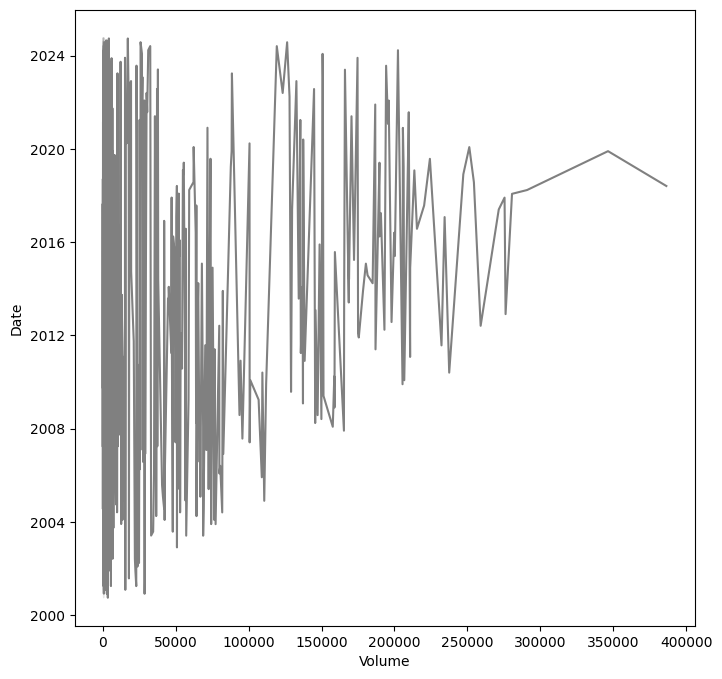

In [54]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Volume",y="Date",data=df,color="gray")

In [55]:
df.columns

Index(['Date', 'Volume', 'Price', 'Year', 'Month'], dtype='object')

<Axes: xlabel='Year', ylabel='Price'>

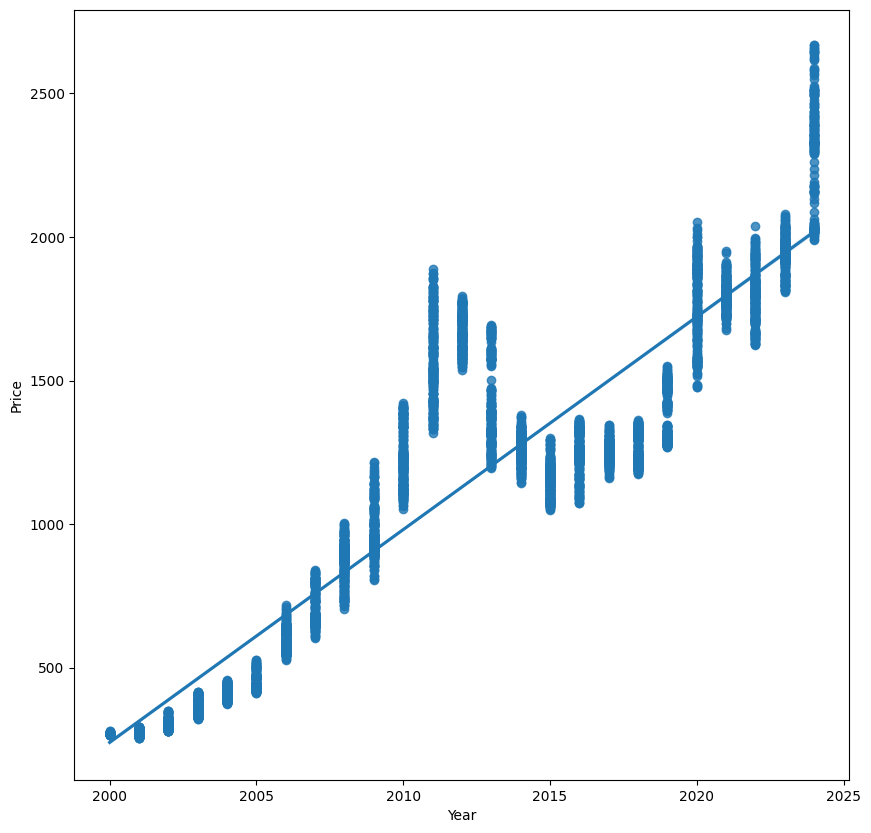

In [56]:
plt.figure(figsize=(10,10))
sns.regplot(x="Year",y="Price",data=df)

**Checking	the	outliers	of	the	target	'price'	feature**

<Axes: ylabel='Price'>

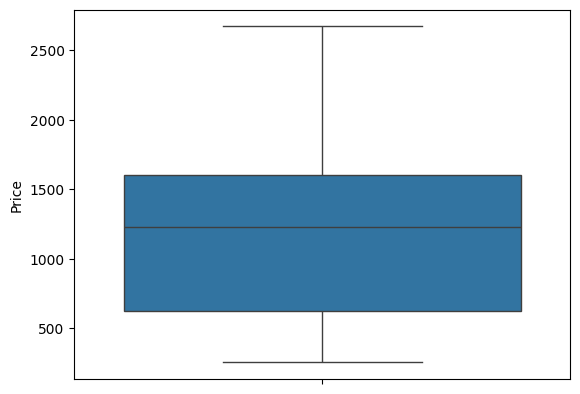

In [57]:
sns.boxplot(df["Price"])

**Boxplot	of	price	Vs	year**

<Axes: xlabel='Year', ylabel='Price'>

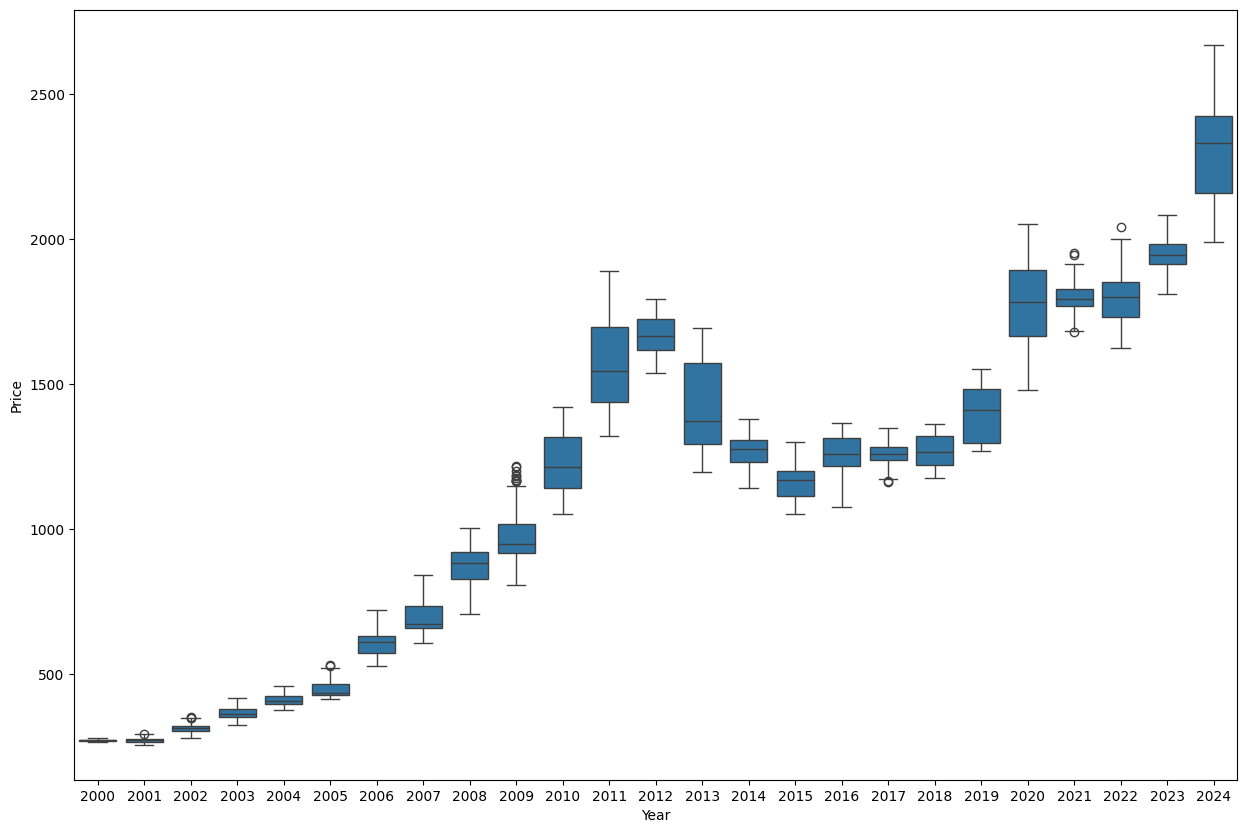

In [58]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Year",y="Price",data=df)

In [59]:
df.drop(["Year","Month"],axis=1,inplace=True)

In [60]:
df.columns

Index(['Date', 'Volume', 'Price'], dtype='object')

In [63]:
df.head(10)

,Date,Volume,Price
0,2000-08-30,0,273.9
1,2000-08-31,0,278.3
2,2000-09-01,0,277.0
3,2000-09-05,2,275.8
4,2000-09-06,0,274.2
5,2000-09-07,125,274.0
6,2000-09-08,0,273.3
7,2000-09-11,0,273.1
8,2000-09-12,0,272.9
9,2000-09-13,0,272.8


In [64]:
df=pd.read_csv("/content/drive/MyDrive/datasets/gold.csv")

In [65]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8-Oct-24,"2,639.00","2,639.00","2,609.30","2,615.00","2,615.00",687
1,7-Oct-24,"2,648.70","2,657.40","2,639.00","2,644.80","2,644.80",284
2,4-Oct-24,"2,656.00","2,667.00","2,639.00","2,645.80","2,645.80",114
3,3-Oct-24,"2,642.80","2,657.10","2,640.00","2,657.10","2,657.10",354
4,2-Oct-24,"2,650.60","2,657.20","2,640.00","2,647.10","2,647.10",72


In [66]:
df.drop(["Adj Close","Volume"],axis=1,inplace=True)

In [67]:
# Rename a single column
df = df.rename(columns={'Close': 'Price'})
print(df.head())

       Date      Open      High       Low     Price
0  8-Oct-24  2,639.00  2,639.00  2,609.30  2,615.00
1  7-Oct-24  2,648.70  2,657.40  2,639.00  2,644.80
2  4-Oct-24  2,656.00  2,667.00  2,639.00  2,645.80
3  3-Oct-24  2,642.80  2,657.10  2,640.00  2,657.10
4  2-Oct-24  2,650.60  2,657.20  2,640.00  2,647.10


In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [69]:
df.head()

,Date,Open,High,Low,Price
0,2000-08-30,273.9,273.9,273.9,273.9
1,2000-08-31,274.8,278.3,274.8,278.3
2,2000-09-01,277,277,277,277
3,2000-09-05,275.8,275.8,275.8,275.8
4,2000-09-06,274.2,274.2,274.2,274.2


In [70]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

**Splitting Data to Training & Test Sets**

In [71]:
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(128,128,128,0.8)')

In [72]:
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

251

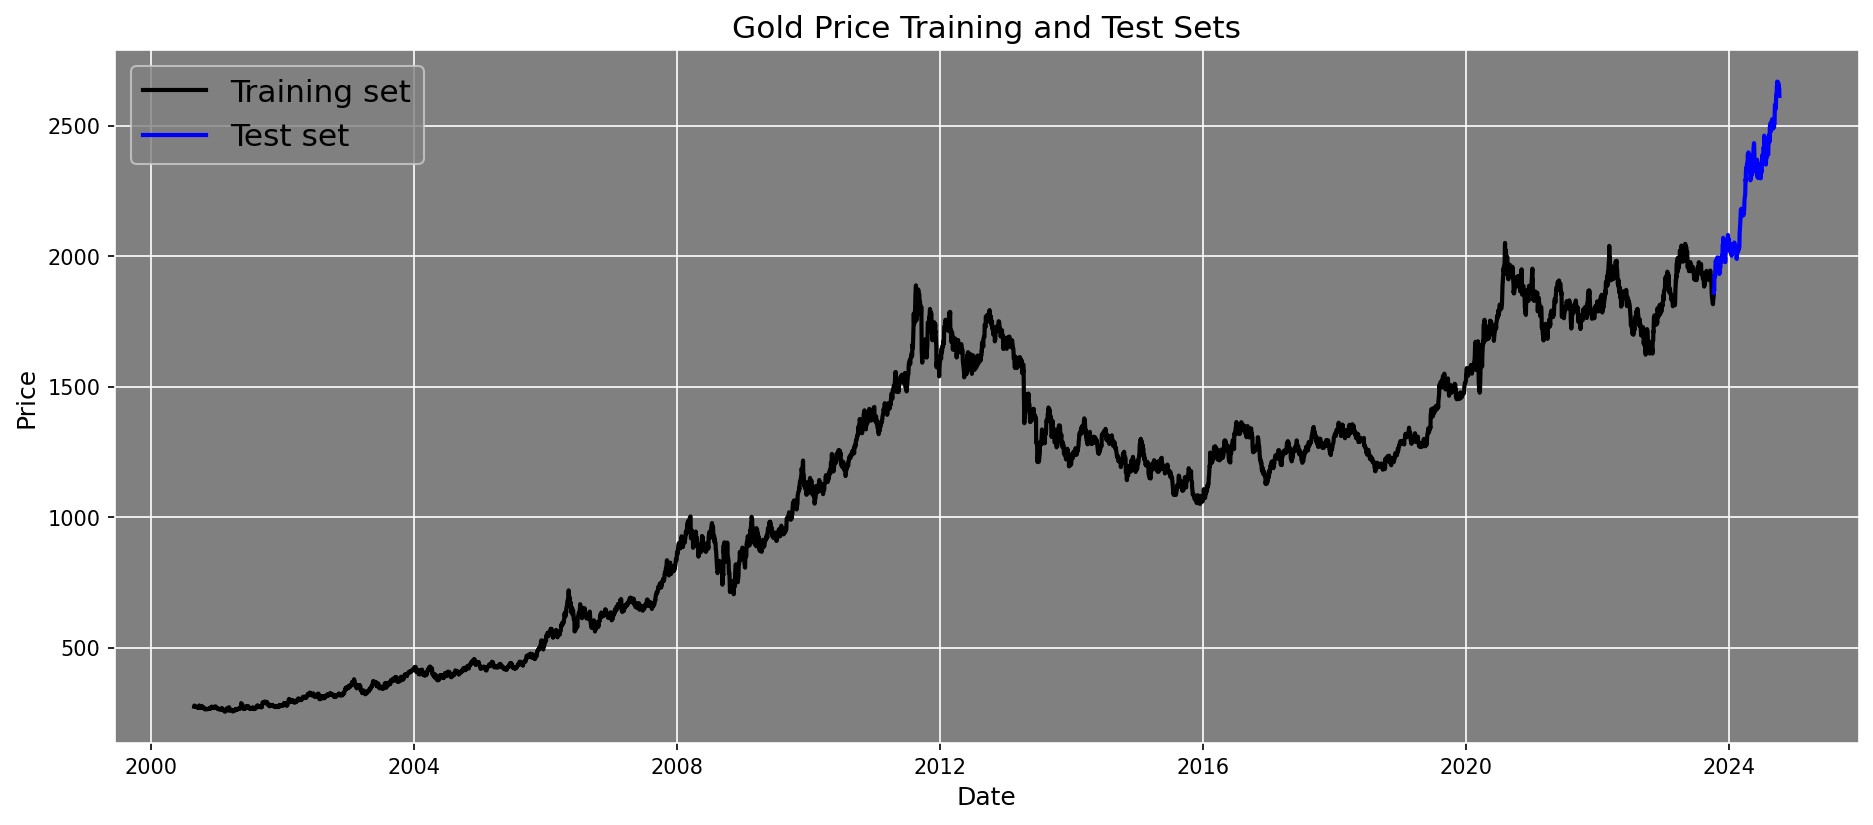

In [73]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'gray'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

**Data Scaling**

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

MinMaxScaler()

In [78]:
import joblib

joblib.dump(scaler, 'scaler_price.pkl')

['scaler_price.pkl']

In [79]:
window_size = 60

**Training**

In [80]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [81]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

**Test**

In [82]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [83]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [84]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [85]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [86]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (5737, 60, 1)
y_train Shape:  (5737, 1)
X_test Shape:   (251, 60, 1)
y_test Shape:   (251, 1)


In [87]:
df.head()

,Date,Open,High,Low,Price
0,2000-08-30,273.9,273.9,273.9,273.9
1,2000-08-31,274.8,278.3,274.8,278.3
2,2000-09-01,277.0,277.0,277.0,277.0
3,2000-09-05,275.8,275.8,275.8,275.8
4,2000-09-06,274.2,274.2,274.2,274.2


**Creating LSTM**

In [88]:
# importing libraries
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [89]:
from tensorflow.keras.regularizers import L2

In [37]:
# from keras.models import Sequential , Model
# input1 = Input(shape=(window_size,1))
# model = Sequential()

# # First LSTM layer with Dropout
# model.add(LSTM(units=64, return_sequences=True,input_shape=(window_size,1)))

# model.add(Dropout(0.2))

# # Second LSTM layer with Dropout
# model.add(LSTM(units=64, return_sequences=True))
# model.add(Dropout(0.2))

# # Third LSTM layer with Dropout
# model.add(LSTM(units=64))
# model.add(Dropout(0.2))

# # Dense layers
# model.add(Dense(32,activation='softmax'))
# model.add(Dense(1))

# # Compile the model
# model = Model(inputs=input1, outputs=[dnn_output])
# model.compile(loss='mean_squared_error', optimizer='Nadam')
# model.summary()


In [90]:
from keras.models import Sequential , Model
from keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.regularizers import L2

input1 = Input(shape=(window_size,1))
# model = Sequential() #This line is not needed anymore

# First LSTM layer with Dropout
x = LSTM(units=64, return_sequences=True)(input1) #Pass input1 to the first layer

x = Dropout(0.2)(x)

# Second LSTM layer with Dropout
x = LSTM(units=64, return_sequences=True)(x)
x = Dropout(0.2)(x)

# Third LSTM layer with Dropout
x = LSTM(units=64)(x)
x = Dropout(0.2)(x)

# Dense layers
x = Dense(32,activation='softmax')(x)
dnn_output = Dense(1)(x) #Assign the output of the final layer to dnn_output

# Compile the model
model = Model(inputs=input1, outputs=[dnn_output]) #Now dnn_output is defined
model.compile(loss='mean_squared_error', optimizer='Nadam')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [92]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - loss: 0.0295 - val_loss: 0.0103
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - loss: 6.2161e-04 - val_loss: 0.0019
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - loss: 5.0062e-04 - val_loss: 0.0014
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - loss: 4.6692e-04 - val_loss: 0.0011
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - loss: 4.2344e-04 - val_loss: 9.5367e-04
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - loss: 3.9706e-04 - val_loss: 0.0013
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - loss: 3.6376e-04 - val_loss: 6.6243e-04
Epoch 9/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - loss: 3.3885e-04 - val_loss: 6.2936e-04
Epoch 10/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - loss: 3.2234e-04 - val_loss: 6.3621e-04
Epoch 11/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - los

In [93]:
model.save('best_model.h5')

In [94]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0098
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step


In [95]:
from sklearn.metrics import mean_absolute_percentage_error

In [96]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [97]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.022080786526203156
Test MAPE: 0.14126866796041185
Test Accuracy: 0.8587313320395882


In [98]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

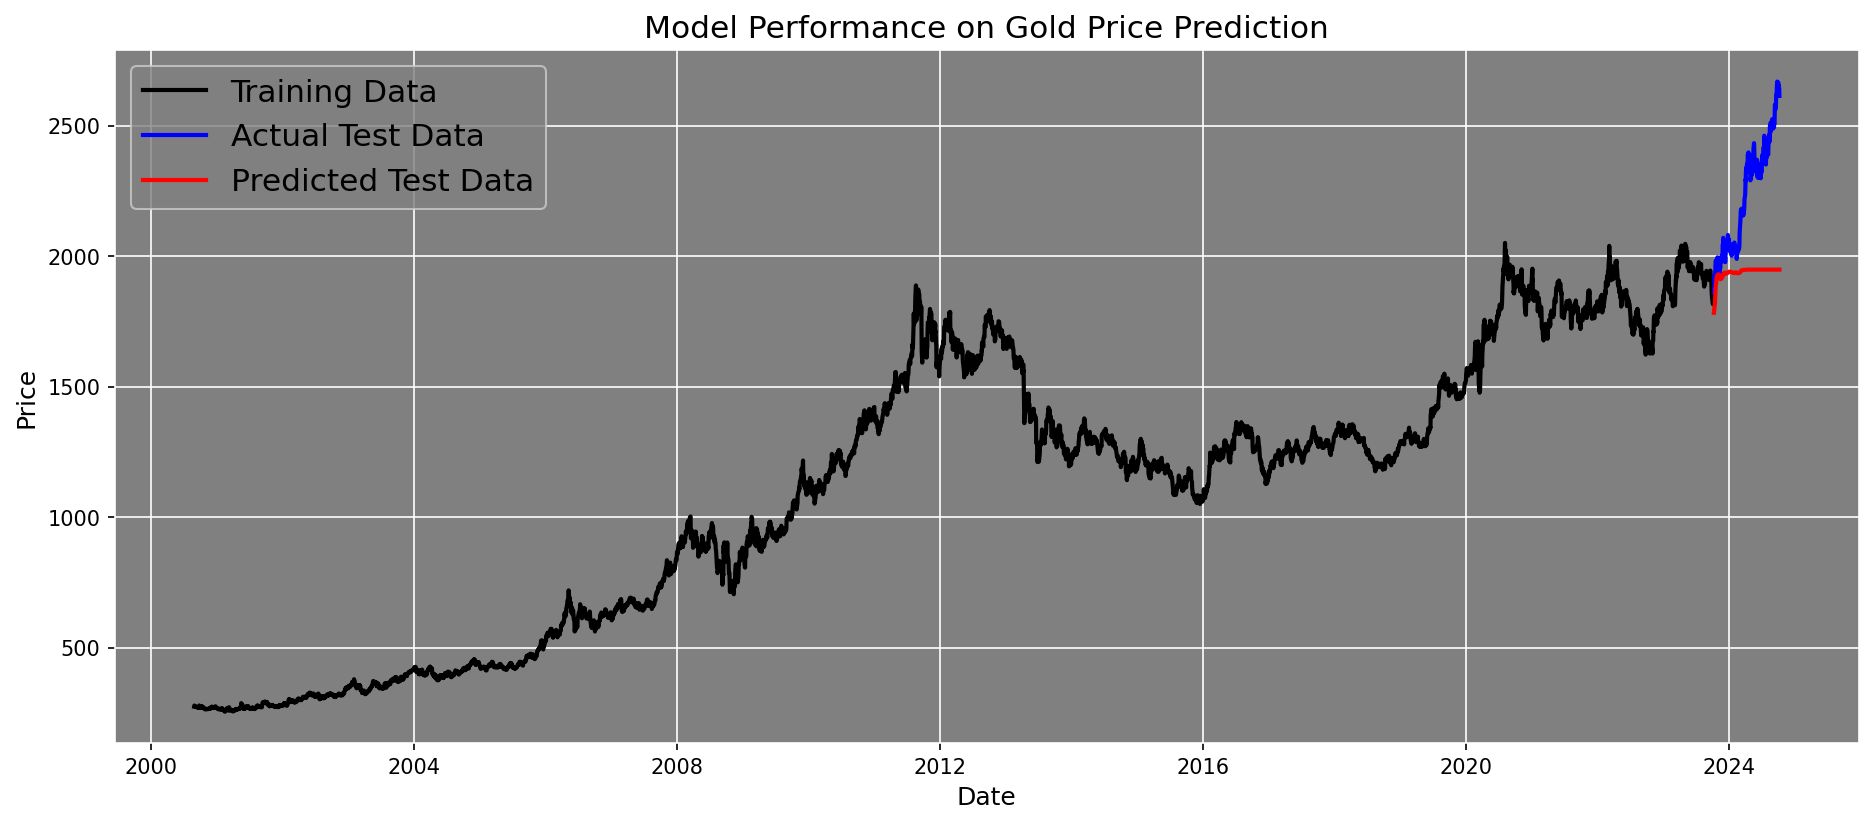

In [99]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'gray'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()